# Pré-processamento e visualização preliminar

Este notebook é utilizado tanto para visualização quanto pré-processamento dos dados de entrada.

### Imports e configurações iniciais

In [1]:
# Se necessário (usando kernel conda_amazonei_tensorflow2_p36 do Sagemaker)
%pip install wordcloud
%pip install stanza

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 435 kB 36.7 MB/s            
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 691 kB 34.3 MB/s            
     |████████████████████████████████| 240 kB 103.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 881.9 MB 7.4 kB/s              
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234906 sha256=925d6769c1b3981aff542cef02c27e087fb817b51a33b933614802db376cfd3c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/20/ae/c3/a0104b9bcd7396b30ea031e758ff74ab197e63f203e895ad69
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [2]:
from python_scripts.save_load import load_df_from_bucket, save_df_to_s3_bucket
from python_scripts.plots import plot_cloud
from python_scripts.processing import create_tokenized_df

### Visualizações com dados crus

In [3]:
file_name = 'dados_brutos.csv'
raw_data = load_df_from_bucket(file_name, tipo='bruto')
raw_data.head()

fake                                               text
0     0   A divisão do STF ao meio entre partidários e ...
1     1  General manda recado para STF: "Abaixaram as c...
2     1  O Nordeste acordou! Lula e o PT são enxotados:...
3     0   Dois relatórios da Polícia Federal, com análi...
4     1  Coreia do Norte declara status de QUASE-GUERRA...

In [4]:
raw_words =' '.join([text for text in raw_data.text])

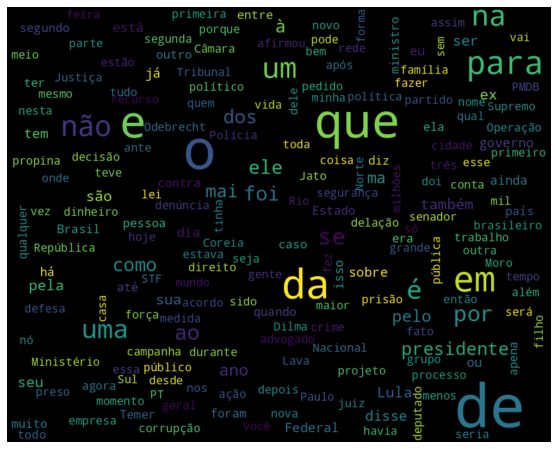

In [5]:
plot_cloud(raw_words)

Como é de se esperar, as contagens de palavras são dominadas por stopwords, palavras com pouco significado para os textos. 

### Visualização com dados processados

Para uma análise mais eficaz, é necessário eliminar as stopwords. Durante esta limpeza, também serão removidos sinais de pontuação, acentos e outros caracteres especiais e todas as palavras serão padronizadas para utilizar letras minúsculas apenas. Após esta limpeza, será feita uma nova visualização dos dados.

In [6]:
processed_df = create_tokenized_df(raw_data)

Processando linhas 0 a 99...
6.857142857142857
6.545454545454546
7.25
7.363636363636363
8.166666666666666
5.769230769230769
5.2
6.7
5.25
7.333333333333333
7.444444444444445
8.25
6.555555555555555
7.428571428571429
8.222222222222221
6.571428571428571
5.95
6.444444444444445
7.818181818181818
6.5
7.909090909090909
6.636363636363637
6.1
6.105263157894737
6.076923076923077
6.833333333333333
7.333333333333333
7.538461538461538
7.363636363636363
7.4375
7.0
6.96
6.0
7.043478260869565
7.294117647058823
7.375
5.545454545454546
5.333333333333333
6.0
3.5
7.0
7.0
1.0
6.875
8.0
6.066666666666666
6.285714285714286
6.7894736842105265
6.75
6.666666666666667
6.2727272727272725
6.526315789473684
6.5
7.105263157894737
7.5
5.333333333333333
5.25
5.473684210526316
5.75
6.5
6.4375
5.6
5.875
7.375
7.615384615384615
6.928571428571429
7.555555555555555
8.6
8.666666666666666
8.5
7.25
6.625
5.0
6.529411764705882
7.157894736842105
8.25
8.1
7.5
6.214285714285714
7.545454545454546
7.875
8.058823529411764
6.857142857

In [7]:
processed_df['words_str'] = processed_df['words'].apply(lambda x: ' '.join(x))
processed_df['lemmas_str'] = processed_df['lemmas'].apply(lambda x: ' '.join(x))

In [8]:
processed_df.head()

fake                                               text  \
0     0   A divisão do STF ao meio entre partidários e ...   
1     1  General manda recado para STF: "Abaixaram as c...   
2     1  O Nordeste acordou! Lula e o PT são enxotados:...   
3     0   Dois relatórios da Polícia Federal, com análi...   
4     1  Coreia do Norte declara status de QUASE-GUERRA...   

                                               words  \
0  [divisão, STF, meio, partidários, independente...   
1  [General, manda, recado, STF, Abaixaram, calça...   
2  [Nordeste, acordou, Lula, PT, enxotados, Chega...   
3  [Dois, relatórios, Polícia, Federal, análises,...   
4  [Coreia, Norte, declara, status, QUASE-GUERRA,...   

                                              lemmas  avg_sent_len  \
0  [divisão, STF, meio, partidário, independente,...     10.747664   
1  [general, mandar, recado, STF, abaixar, calça,...     11.000000   
2  [nordeste, acordar, Lula, PT, enxotar, chegar,...      7.333333   
3  [dois, relatório, Polícia, Federal, análise, m...     17.000000   
4  [Coreia, Norte, declarar, status, QUASE-GUERRA...     11.666667   

   avg_word_len                                          words_str  \
0      6.690641  divisão STF meio partidários independentes fic...   
1      6.461584  General manda recado STF Abaixaram calças Cong...   
2      6.565873  Nordeste acordou Lula PT enxotados Chega bande...   
3      7.237319  Dois relatórios Polícia Federal análises mater...   
4      6.513799  Coreia Norte declara status QUASE-GUERRA mobil...   

                                          lemmas_str  
0  divisão STF meio partidário independente ficar...  
1  general mandar recado STF abaixar calça congre...  
2  nordeste acordar Lula PT enxotar chegar bandei...  
3  dois relatório Polícia Federal análise materia...  
4  Coreia Norte declarar status QUASE-GUERRA mobi...

In [9]:
processed_words = ' '.join([row for row in processed_df['words_str']])

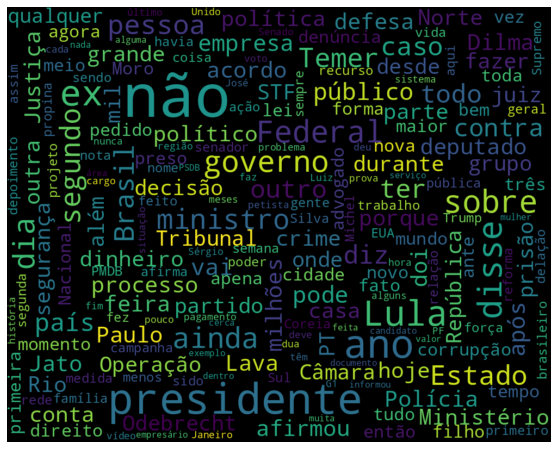

In [10]:
plot_cloud(processed_words)

In [11]:
processed_lemmas = ' '.join([row for row in processed_df['lemmas_str']])

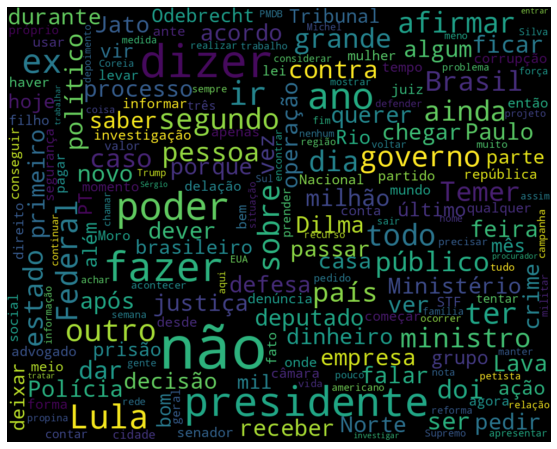

In [12]:
plot_cloud(processed_lemmas)

Com o pré-processamento, nota-se que restam palavras mais significativas nos textos. Em particular, nota-se que os textos da base parecem enfatizar assuntos políticos.

Os dados pré-processados são então salvos para que possam ser utilizados no treinamento e validação de modelos.

In [13]:
processed_file = 'dados_processados.csv'
processed_bucket = 'projetointerdisciplinardadosprocessados'

# Salvar tudo no S3 (armazenamento não é problema)
save_df_to_s3_bucket(processed_df, file_name=processed_file, tipo='processado')

# Remover colunas de listas antes de salvar, economizar espaço (GitHub aceita só até 100 MB)
for column_name in ['words', 'lemmas']:
    if column_name in processed_df.columns:
        processed_df = processed_df.drop(column_name, axis=1)

processed_df.to_csv(processed_file, encoding='utf-8', index=False)